# 볼린저 밴드

1. 파일로드 
2. 결측치 & 이상치 제거 
3. 시간, 종가만의 데이터프레임을 생성
4. 이동평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수 대입
5. 상단 밴드 : 이동평균선 + (2 * 데이터 20개의 Std.dev)
6. 하단 밴드 : 이동평균선 - (2 * 데이터 20개의 Std.dev)
7. 구매 상태를 확인하는 파생변수 생성 
8. 구매 상태 입력
9. 수익률 계산 & 누적수익률 계산

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../csv/GM.csv', index_col='Date')
df.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000


In [5]:
df = df.loc[~df.isin((np.nan, np.inf, -np.inf)).any(axis = 'columns')]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000
...,...,...,...,...,...,...
2019-06-18,36.380001,36.779999,36.139999,36.700001,36.700001,8226900
2019-06-19,37.000000,37.470001,36.750000,36.779999,36.779999,10884800
2019-06-20,37.150002,37.310001,36.490002,36.959999,36.959999,8639700


In [6]:
# 시간과 종가만의 데이터프레임 생성

price_df = df[['Adj Close']]
price_df

,Adj Close
Date,
2010-11-18,27.027195
2010-11-19,27.082527
2010-11-22,26.940243
2010-11-23,26.284130
2010-11-24,26.465942
...,...
2019-06-18,36.700001
2019-06-19,36.779999
2019-06-20,36.959999


In [11]:
# 이동 평균선 : 종가 데이터 20개 평균값
# rolling()

price_df['center'] = price_df['Adj Close'].rolling(20).mean()

C:\Users\zino0\AppData\Local\Temp\ipykernel_20864\3789417721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['center'] = price_df['Adj Close'].rolling(20).mean()


In [18]:
# ub, lb 두개의 파생변수 생성 

price_df['ub'] = price_df['center'] + price_df['Adj Close'].rolling(20).std() * 2

C:\Users\zino0\AppData\Local\Temp\ipykernel_20864\3278371958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['ub'] = price_df['center'] + price_df['Adj Close'].rolling(20).std() * 2


In [21]:
price_df['lb'] = price_df['center'] - price_df['Adj Close'].rolling(20).std() * 2

C:\Users\zino0\AppData\Local\Temp\ipykernel_20864\3753849304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['lb'] = price_df['center'] - price_df['Adj Close'].rolling(20).std() * 2


In [23]:
price_df.tail()

,Adj Close,center,ub,lb
Date,,,,
2019-06-18,36.700001,35.249369,37.239697,33.259041
2019-06-19,36.779999,35.251553,37.248834,33.254271
2019-06-20,36.959999,35.340899,37.478352,33.203445
2019-06-21,36.919998,35.449022,37.678999,33.219046
2019-06-24,36.814999,35.552390,37.836478,33.268302


In [29]:
# 하나의 주식 구매 후 ub 초과 시 판매 or lb 미만시 재구입 이런 방식의 투자 

test_df = price_df.tail(200)

<Axes: xlabel='Date'>

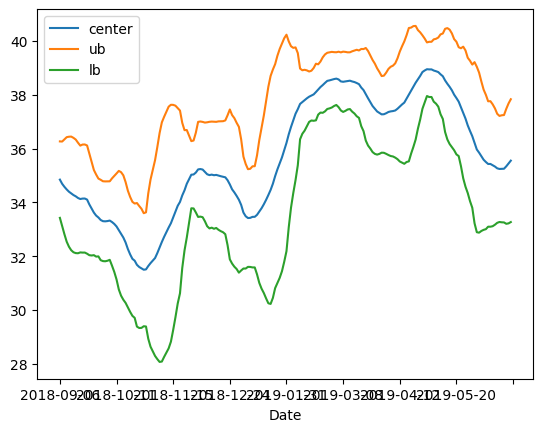

In [30]:
test_df.drop('Adj Close', axis = 1).plot()

In [33]:
start = '2011-01-02'
price_df2 = price_df.loc[start : ]
price_df2.head()

,Adj Close,center,ub,lb
Date,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661
2011-01-04,29.959959,27.569085,29.692262,25.445907
2011-01-05,30.094337,27.703075,30.105109,25.301041
2011-01-06,30.750460,27.878961,30.626324,25.131599
2011-01-07,30.813686,28.086072,31.064934,25.107210


In [35]:
# 거래 내역이라는 파생변수 

price_df2['trade'] = ""
price_df2


C:\Users\zino0\AppData\Local\Temp\ipykernel_20864\3421436266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['trade'] = ""


,Adj Close,center,ub,lb,trade
Date,,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661,
2011-01-04,29.959959,27.569085,29.692262,25.445907,
2011-01-05,30.094337,27.703075,30.105109,25.301041,
2011-01-06,30.750460,27.878961,30.626324,25.131599,
2011-01-07,30.813686,28.086072,31.064934,25.107210,
...,...,...,...,...,...
2019-06-18,36.700001,35.249369,37.239697,33.259041,
2019-06-19,36.779999,35.251553,37.248834,33.254271,
2019-06-20,36.959999,35.340899,37.478352,33.203445,


### 구매 내역 추가 

- 조건
    1. 상단 밴드보다 종가가 높은 경우 
        - 현재 구매 상태이면, 
            - 매도 trade = ''
        - 구매가 상태가 아니면,
            - 아무 행동도 하지 않는다. trade = ""
    2. 하단 밴드보다 종가가 낮은 경우
        - 현재 구매상태이면,
            - 아무 행동도 하지 않는다. trade = 'buy'
        - 구매 상태가 아니면, 
            - 매수 trade = 'buy'
    3. 하단 밴드와 상단 밴드 사이에 종가가 존재하는 경우
        - 현재 구매 상태이면
            - 아무 행동도 하지않는다. trade = 'buy'
        - 구매 상태가 아니면, 
            - 아무 행동도 하지 않는다. trade = ''
            

In [38]:
for i in price_df2.index : 
    # 상단 밴드보다 종가가 높은 경우
    if price_df2.loc[i, 'Adj Close'] > price_df2.loc[i, 'ub']:
        # 현재 구매 상태이면(전날 'trade'가 'buy')
        if price_df2.shift(1).loc[i, 'trade'] == 'buy' : 
            #매도
            price_df2.loc[i, 'trade'] = ''
        else : 
            price_df2.loc[i, 'trade'] = ''
    # 하단 밴드보다 종가가 낮은 경우
    elif price_df2.loc[i, 'Adj Close'] < price_df2.loc[i, 'lb'] : 
        # 현재 구매상태이면,
        if price_df2.shift(1).loc[i, 'trade'] == 'buy' :
            # 구매 상태를 유지 
            price_df2.loc[i, 'trade'] = 'buy'
        else : 
            #매수
            price_df2.loc[i, 'trade'] = 'buy'

    else :
        # 현재 구매상태이면
        if price_df2.shift(1).loc[i , 'trade'] == 'buy' : 
            price_df2.loc[i, 'trade'] = 'buy'
        else :
            price_df2.loc[i, 'trade'] = ''


In [39]:
price_df2['trade'].value_counts()

buy    1130
       1002
Name: trade, dtype: int64

### 수익률 계산 

1. 구매한 날의 종가
    - 전날의 trade 항목이 ''이고, 현재의 trade가 'buy'인 날의 종가 
2. 판매한 날의 종가 
    - 전날의 trade가 'buy'이고, 현재의 trade가 ''인 날의 종가 
3. 수익률 계산 
    - (판매 가격 - 구매 가격)/ (구매 가격) +1
4. 구매 가격과 판매 가격을 초기화 
5. 반복시, 여러개의 수익률 발생 
6. 여러개의 수익률로 누적 수익률 계산 

In [40]:
rtn = 1.0

price_df2['return'] = 1
buy = 0.0
sell = 0.0

for i in price_df2.index :
    # 구매가 출력
    if (price_df2.shift(1).loc[i, 'trade'] == '') and (price_df2.loc[i, 'trade'] == 'buy') :
        buy = price_df2.loc[i, 'Adj Close']
        print('진입일 : ', i, '구매가격 : ', buy)
    # 판매가 출력
    elif (price_df2.shift(1).loc[i, 'trade'] == 'buy') and (price_df2.loc[i, 'trade'] == '') :
        sell = price_df2.loc[i, 'Adj Close']
        rtn = (sell-buy) / buy + 1
        price_df2.loc[i, 'return'] = rtn
        print('판매일 : ', i, '판매 가격 : ', sell, '수익률 : ', rtn)

    # 구매가, 판매가 초기화 
    if price_df2.loc[i, 'trade'] == '':
        buy = 0.0
        sell = 0.0
        

C:\Users\zino0\AppData\Local\Temp\ipykernel_20864\3470700273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['return'] = 1


진입일 :  2011-02-02 구매가격 :  28.205038
판매일 :  2011-04-05 판매 가격 :  25.983728 수익률 :  0.9212442117610337
진입일 :  2011-06-02 구매가격 :  23.398802
판매일 :  2011-07-07 판매 가격 :  25.137901 수익률 :  1.0743242752342619
진입일 :  2011-07-27 구매가격 :  22.244669
판매일 :  2012-01-05 판매 가격 :  17.525387 수익률 :  0.7878466072028314
진입일 :  2012-03-06 구매가격 :  19.43049
판매일 :  2012-04-02 판매 가격 :  21.15378 수익률 :  1.0886899918633035
진입일 :  2012-04-09 구매가격 :  19.1301
판매일 :  2012-08-07 판매 가격 :  16.142014 수익률 :  0.8438018619871303
진입일 :  2013-02-20 구매가격 :  21.42255
판매일 :  2013-03-20 판매 가격 :  23.082602 수익률 :  1.0774908682673165
진입일 :  2013-06-20 구매가격 :  25.738686
판매일 :  2013-09-10 판매 가격 :  29.248499 수익률 :  1.1363633326114626
진입일 :  2013-10-03 구매가격 :  27.896749
판매일 :  2013-10-30 판매 가격 :  29.430317 수익률 :  1.0549730006173836
진입일 :  2014-01-16 구매가격 :  30.8295
판매일 :  2014-03-05 판매 가격 :  29.659563 수익률 :  0.9620513793606772
진입일 :  2014-03-13 구매가격 :  26.948151
판매일 :  2014-06-04 판매 가격 :  29.125372 수익률 :  1.080792964237138
진입일 :  2014-07-24 

In [41]:
# 누적 수익률

acc_rtn = 1.0

for i in price_df2.index :
    rtn = price_df2.loc[i, 'return']
    acc_rtn *= rtn
    price_df2.loc[i, 'acc_rtn'] = acc_rtn


print('누적 수익률 : ', acc_rtn)

C:\Users\zino0\AppData\Local\Temp\ipykernel_20864\4139814612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2.loc[i, 'acc_rtn'] = acc_rtn


누적 수익률 :  1.1764314536564138


In [42]:
price_df2

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661,,1.0,1.000000
2011-01-04,29.959959,27.569085,29.692262,25.445907,,1.0,1.000000
2011-01-05,30.094337,27.703075,30.105109,25.301041,,1.0,1.000000
2011-01-06,30.750460,27.878961,30.626324,25.131599,,1.0,1.000000
2011-01-07,30.813686,28.086072,31.064934,25.107210,,1.0,1.000000
...,...,...,...,...,...,...,...
2019-06-18,36.700001,35.249369,37.239697,33.259041,buy,1.0,1.176431
2019-06-19,36.779999,35.251553,37.248834,33.254271,buy,1.0,1.176431
2019-06-20,36.959999,35.340899,37.478352,33.203445,buy,1.0,1.176431
